In [1]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ardav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ardav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ardav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df_1 = pd.read_csv("hf://datasets/joangaes/depression/clean_encoded_df.csv")
df_1.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [3]:
df_2 = pd.read_csv("hf://datasets/ShreyaR/DepressionDetection/depression_dataset_reddit_twitter.csv")
df_2.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


Merge two datasets

In [4]:
df_2.rename(columns={
    'clean_text': 'text'
}, inplace=True)

df_1.rename(columns={
    'label': 'is_depression'
}, inplace=True)

df_2.columns, df_1.columns

(Index(['text', 'is_depression'], dtype='object'),
 Index(['text', 'is_depression'], dtype='object'))

In [5]:
print(df_2.head())
print(df_1.head())

                                                text  is_depression
0  we understand that most people who reply immed...              1
1  welcome to r depression s check in post a plac...              1
2  anyone else instead of sleeping more when depr...              1
3  i ve kind of stuffed around a lot in my life d...              1
4  sleep is my greatest and most comforting escap...              1
                                                text  is_depression
0  dear american teens question dutch person hear...              0
1  nothing look forward lifei dont many reasons k...              1
2  music recommendations im looking expand playli...              0
3  im done trying feel betterthe reason im still ...              1
4  worried  year old girl subject domestic physic...              1


In [6]:
len(df_2), len(df_1)

(7731, 27977)

In [7]:
df = pd.concat([df_1,df_2])
df

,text,is_depression
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


In [8]:
len(df)

35708

In [9]:
df.to_csv('depression-dataset-combined.csv', index=False)

## Data Cleaning

In [10]:
def preprocess_text(text):
    # convert to lowercase
    text = text.lower()

    # Remove digits and special characters
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize text
    tokens = nltk.word_tokenize(text)

    return tokens

Remove Stop Words

In [11]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    return filtered_tokens

Lemmatization

In [12]:
def lemmatization(tokens):
    lemmatizer = nltk.WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return lemmatized_tokens

In [13]:
def clean_text_pipeline(text):
    tokens = preprocess_text(text)
    filtered_tokens = remove_stopwords(tokens)
    lemmatized_tokens = lemmatization(filtered_tokens)
    clean_text = ' '.join(lemmatized_tokens)

    return clean_text

Apply to the dataset


In [14]:
df.columns

Index(['text', 'is_depression'], dtype='object')

In [15]:
df['text'] = df['text'].apply(clean_text_pipeline)

df.head(15)


,text,is_depression
0,dear american teen question dutch person heard...,0
1,nothing look forward lifei dont many reason ke...,1
2,music recommendation im looking expand playlis...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physica...,1
5,hey rredflag sure right place post go im curre...,1
6,feel like someone need hear tonight feeling ri...,0
7,deserve liveif died right noone would carei re...,1
8,feel good ive set dateim killing friday nice f...,1
9,live guiltok made stupid random choice getting...,1


In [16]:
df.tail()

,text,is_depression
7726,snow,0
7727,moulin rouge mad cry,0
7728,trying shout find people list,0
7729,ughh find red sox hat got ta wear creepy nick ...,0
7730,slept wonderfully finally tried swatching new ...,0


In [17]:
is_depression = df['is_depression'].value_counts()
is_depression

is_depression
0    18039
1    17669
Name: count, dtype: int64

## Data Visualization

### Label Proportion

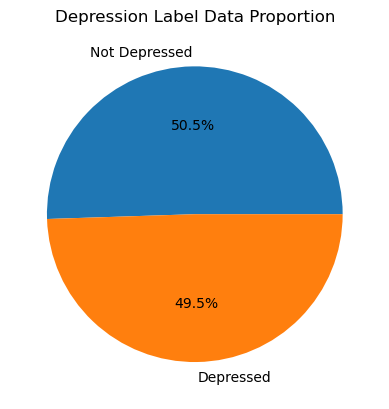

In [18]:
plt.pie(is_depression, labels=['Not Depressed', 'Depressed'], autopct='%1.1f%%')
plt.title('Depression Label Data Proportion')
plt.show()

### Word Cloud Visualization

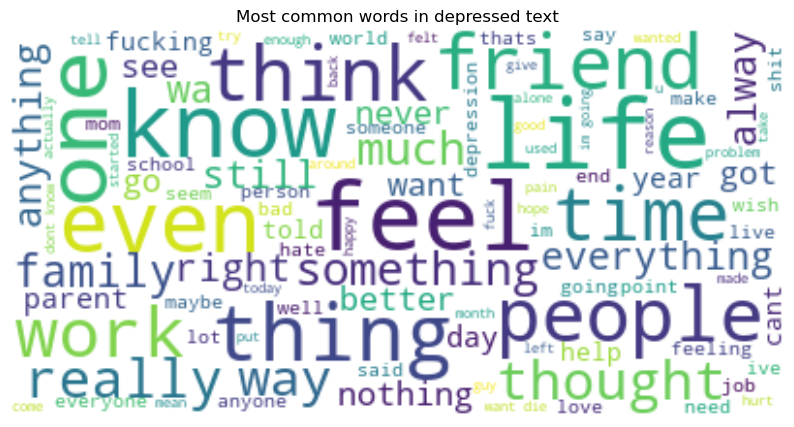

In [19]:
from wordcloud import WordCloud

depressed_words = df[df['is_depression'] == 1]['text'].str.cat(sep=" ")

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(depressed_words)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most common words in depressed text")
plt.show()

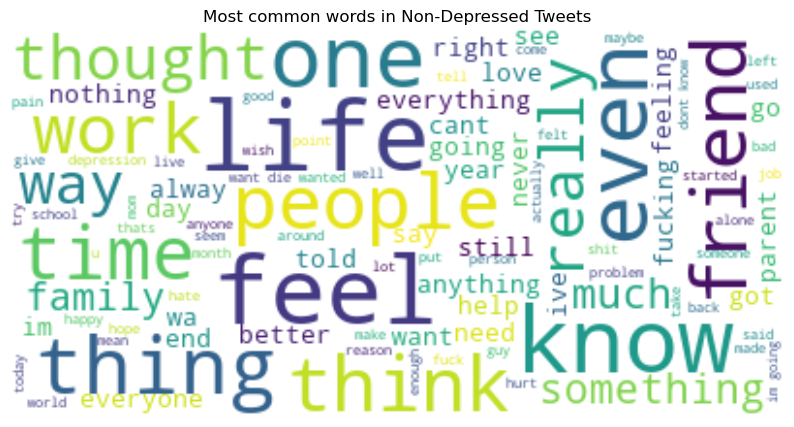

In [20]:
non_depressed_words = df[df['is_depression'] == 0]['text'].str.cat(sep=" ")

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(depressed_words)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most common words in Non-Depressed Tweets")
plt.show()

## Predicting Sentiment with BERT

In [21]:
df

,text,is_depression
0,dear american teen question dutch person heard...,0
1,nothing look forward lifei dont many reason ke...,1
2,music recommendation im looking expand playlis...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physica...,1
...,...,...
7726,snow,0
7727,moulin rouge mad cry,0
7728,trying shout find people list,0
7729,ughh find red sox hat got ta wear creepy nick ...,0


In [22]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [23]:
from transformers import BertTokenizer
import torch

model_ckpt = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_ckpt)

def tokenize_data(texts):
    return tokenizer(texts, padding=True, truncation=True, max_length=512, return_tensors="pt")

train_encodings = tokenize_data(train_df["text"].tolist())
test_encodings = tokenize_data(test_df["text"].tolist())

In [24]:
print("Input IDs shape:", train_encodings['input_ids'].shape)
print("Attention Mask shape:", train_encodings['attention_mask'].shape)

Input IDs shape: torch.Size([28566, 512])
Attention Mask shape: torch.Size([28566, 512])


In [25]:
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_labels = train_df["is_depression"].tolist()
test_labels = test_df["is_depression"].tolist()

train_dataset = SentimentDataset(train_encodings, train_labels)
test_dataset = SentimentDataset(test_encodings, test_labels)


### Load BERT for Sequence Classification

In [26]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

model = BertForSequenceClassification.from_pretrained(model_ckpt, num_labels=2)  # Change `num_labels` as per your dataset

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=4,  # Lower batch size if memory issues occur
    per_device_eval_batch_size=4,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/21426 [00:00<?, ?it/s]

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\ardav\AppData\Roaming\Python\Python312\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


{'loss': 0.754, 'grad_norm': 8.135113716125488, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.0}
{'loss': 0.6377, 'grad_norm': 9.634368896484375, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.0}
{'loss': 0.7126, 'grad_norm': 14.219286918640137, 'learning_rate': 3e-06, 'epoch': 0.0}
{'loss': 0.6972, 'grad_norm': 6.140207290649414, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.01}
{'loss': 0.6871, 'grad_norm': 4.272370338439941, 'learning_rate': 5e-06, 'epoch': 0.01}
{'loss': 0.6255, 'grad_norm': 7.542876243591309, 'learning_rate': 6e-06, 'epoch': 0.01}
{'loss': 0.571, 'grad_norm': 11.244563102722168, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.01}
{'loss': 0.6604, 'grad_norm': 7.19282341003418, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.01}
{'loss': 0.5536, 'grad_norm': 7.499499797821045, 'learning_rate': 9e-06, 'epoch': 0.01}
{'loss': 0.5241, 'grad_norm': 13.684825897216797, 'learning_rate': 1e-05, 'epoch': 0.01}
{'loss': 0.4989, 'grad_norm': 16.07873344

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.3263, 'grad_norm': 0.33836302161216736, 'learning_rate': 4.9976106279269806e-05, 'epoch': 0.07}
{'loss': 0.3524, 'grad_norm': 0.2827076315879822, 'learning_rate': 4.9952212558539616e-05, 'epoch': 0.07}
{'loss': 0.5431, 'grad_norm': 9.225239753723145, 'learning_rate': 4.9928318837809426e-05, 'epoch': 0.07}
{'loss': 0.2063, 'grad_norm': 31.892141342163086, 'learning_rate': 4.9904425117079236e-05, 'epoch': 0.08}
{'loss': 0.426, 'grad_norm': 0.36208224296569824, 'learning_rate': 4.988053139634904e-05, 'epoch': 0.08}
{'loss': 0.4075, 'grad_norm': 8.209680557250977, 'learning_rate': 4.985663767561885e-05, 'epoch': 0.08}
{'loss': 0.6444, 'grad_norm': 0.5597372055053711, 'learning_rate': 4.983274395488865e-05, 'epoch': 0.08}
{'loss': 0.5101, 'grad_norm': 27.188573837280273, 'learning_rate': 4.9808850234158464e-05, 'epoch': 0.08}
{'loss': 0.7297, 'grad_norm': 35.479915618896484, 'learning_rate': 4.9784956513428274e-05, 'epoch': 0.08}
{'loss': 0.2534, 'grad_norm': 0.49335914850234985,

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.3956, 'grad_norm': 0.2995690703392029, 'learning_rate': 4.878142024276021e-05, 'epoch': 0.14}
{'loss': 0.5602, 'grad_norm': 0.3455033004283905, 'learning_rate': 4.875752652203001e-05, 'epoch': 0.14}
{'loss': 0.2202, 'grad_norm': 0.2964324355125427, 'learning_rate': 4.873363280129982e-05, 'epoch': 0.14}
{'loss': 0.217, 'grad_norm': 1.5832215547561646, 'learning_rate': 4.870973908056963e-05, 'epoch': 0.15}
{'loss': 0.1354, 'grad_norm': 0.09933444112539291, 'learning_rate': 4.868584535983944e-05, 'epoch': 0.15}
{'loss': 0.2372, 'grad_norm': 0.10811536014080048, 'learning_rate': 4.8661951639109244e-05, 'epoch': 0.15}
{'loss': 0.5532, 'grad_norm': 3.136477470397949, 'learning_rate': 4.8638057918379054e-05, 'epoch': 0.15}
{'loss': 0.2419, 'grad_norm': 9.788460731506348, 'learning_rate': 4.861416419764886e-05, 'epoch': 0.15}
{'loss': 0.4246, 'grad_norm': 0.15128324925899506, 'learning_rate': 4.859027047691867e-05, 'epoch': 0.15}
{'loss': 0.3853, 'grad_norm': 10.446504592895508, 'le

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.6071, 'grad_norm': 0.661566972732544, 'learning_rate': 4.75867342062506e-05, 'epoch': 0.21}
{'loss': 0.3302, 'grad_norm': 0.3401747941970825, 'learning_rate': 4.756284048552041e-05, 'epoch': 0.21}
{'loss': 0.4131, 'grad_norm': 0.29682809114456177, 'learning_rate': 4.7538946764790214e-05, 'epoch': 0.21}
{'loss': 0.1301, 'grad_norm': 0.24390651285648346, 'learning_rate': 4.751505304406002e-05, 'epoch': 0.22}
{'loss': 0.1395, 'grad_norm': 0.14917220175266266, 'learning_rate': 4.749115932332983e-05, 'epoch': 0.22}
{'loss': 0.4566, 'grad_norm': 0.13187900185585022, 'learning_rate': 4.746726560259964e-05, 'epoch': 0.22}
{'loss': 0.2832, 'grad_norm': 17.20735740661621, 'learning_rate': 4.744337188186945e-05, 'epoch': 0.22}
{'loss': 0.5873, 'grad_norm': 0.0950099304318428, 'learning_rate': 4.741947816113925e-05, 'epoch': 0.22}
{'loss': 0.3698, 'grad_norm': 0.2513456344604492, 'learning_rate': 4.739558444040906e-05, 'epoch': 0.22}
{'loss': 0.5329, 'grad_norm': 85.24224090576172, 'lea

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.3706, 'grad_norm': 0.239108607172966, 'learning_rate': 4.6392048169740995e-05, 'epoch': 0.28}
{'loss': 0.8825, 'grad_norm': 121.20494079589844, 'learning_rate': 4.6368154449010805e-05, 'epoch': 0.28}
{'loss': 0.1048, 'grad_norm': 0.29605424404144287, 'learning_rate': 4.634426072828061e-05, 'epoch': 0.28}
{'loss': 0.4164, 'grad_norm': 0.16781295835971832, 'learning_rate': 4.632036700755042e-05, 'epoch': 0.29}
{'loss': 0.1089, 'grad_norm': 0.5680854916572571, 'learning_rate': 4.629647328682022e-05, 'epoch': 0.29}
{'loss': 0.4403, 'grad_norm': 0.20783807337284088, 'learning_rate': 4.627257956609003e-05, 'epoch': 0.29}
{'loss': 0.27, 'grad_norm': 8.707693099975586, 'learning_rate': 4.624868584535984e-05, 'epoch': 0.29}
{'loss': 0.2432, 'grad_norm': 0.1603516787290573, 'learning_rate': 4.622479212462965e-05, 'epoch': 0.29}
{'loss': 0.7281, 'grad_norm': 0.2927004098892212, 'learning_rate': 4.6200898403899456e-05, 'epoch': 0.29}
{'loss': 0.1433, 'grad_norm': 0.3381326198577881, 'le

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.1464, 'grad_norm': 0.21351130306720734, 'learning_rate': 4.519736213323139e-05, 'epoch': 0.35}
{'loss': 0.4982, 'grad_norm': 0.27419939637184143, 'learning_rate': 4.51734684125012e-05, 'epoch': 0.35}
{'loss': 0.2322, 'grad_norm': 0.47176215052604675, 'learning_rate': 4.514957469177101e-05, 'epoch': 0.35}
{'loss': 0.4607, 'grad_norm': 0.4198947846889496, 'learning_rate': 4.512568097104081e-05, 'epoch': 0.36}
{'loss': 0.3016, 'grad_norm': 0.36808261275291443, 'learning_rate': 4.510178725031062e-05, 'epoch': 0.36}
{'loss': 0.2245, 'grad_norm': 0.20407189428806305, 'learning_rate': 4.5077893529580427e-05, 'epoch': 0.36}
{'loss': 0.3566, 'grad_norm': 8.494065284729004, 'learning_rate': 4.505399980885024e-05, 'epoch': 0.36}
{'loss': 0.5928, 'grad_norm': 0.5353451371192932, 'learning_rate': 4.503010608812005e-05, 'epoch': 0.36}
{'loss': 0.4391, 'grad_norm': 0.32182776927948, 'learning_rate': 4.500621236738985e-05, 'epoch': 0.36}
{'loss': 0.2474, 'grad_norm': 0.8609186410903931, 'le

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.4211, 'grad_norm': 16.36155891418457, 'learning_rate': 4.400267609672178e-05, 'epoch': 0.42}
{'loss': 0.4908, 'grad_norm': 68.15784454345703, 'learning_rate': 4.397878237599159e-05, 'epoch': 0.42}
{'loss': 0.2221, 'grad_norm': 0.1624077707529068, 'learning_rate': 4.3954888655261404e-05, 'epoch': 0.42}
{'loss': 0.0046, 'grad_norm': 0.16274654865264893, 'learning_rate': 4.393099493453121e-05, 'epoch': 0.43}
{'loss': 0.5555, 'grad_norm': 0.13194431364536285, 'learning_rate': 4.390710121380102e-05, 'epoch': 0.43}
{'loss': 0.0038, 'grad_norm': 0.5715129971504211, 'learning_rate': 4.388320749307082e-05, 'epoch': 0.43}
{'loss': 0.5979, 'grad_norm': 0.1848585456609726, 'learning_rate': 4.385931377234063e-05, 'epoch': 0.43}
{'loss': 0.3778, 'grad_norm': 0.2628418803215027, 'learning_rate': 4.3835420051610434e-05, 'epoch': 0.43}
{'loss': 0.1561, 'grad_norm': 0.16024480760097504, 'learning_rate': 4.381152633088025e-05, 'epoch': 0.43}
{'loss': 0.1355, 'grad_norm': 0.2484188675880432, 'l

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.5936, 'grad_norm': 8.017555236816406, 'learning_rate': 4.280799006021218e-05, 'epoch': 0.49}
{'loss': 0.3822, 'grad_norm': 1.3253998756408691, 'learning_rate': 4.278409633948199e-05, 'epoch': 0.49}
{'loss': 0.1713, 'grad_norm': 0.4366855323314667, 'learning_rate': 4.276020261875179e-05, 'epoch': 0.49}
{'loss': 0.2078, 'grad_norm': 0.2393008917570114, 'learning_rate': 4.27363088980216e-05, 'epoch': 0.5}
{'loss': 0.4048, 'grad_norm': 8.649219512939453, 'learning_rate': 4.271241517729141e-05, 'epoch': 0.5}
{'loss': 0.524, 'grad_norm': 8.296646118164062, 'learning_rate': 4.268852145656122e-05, 'epoch': 0.5}
{'loss': 0.4824, 'grad_norm': 8.03515625, 'learning_rate': 4.2664627735831025e-05, 'epoch': 0.5}
{'loss': 0.8244, 'grad_norm': 8.357792854309082, 'learning_rate': 4.2640734015100835e-05, 'epoch': 0.5}
{'loss': 0.3268, 'grad_norm': 8.076935768127441, 'learning_rate': 4.261684029437064e-05, 'epoch': 0.5}
{'loss': 0.1915, 'grad_norm': 8.546611785888672, 'learning_rate': 4.259294

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.1925, 'grad_norm': 0.281870573759079, 'learning_rate': 4.161330402370257e-05, 'epoch': 0.56}
{'loss': 0.2612, 'grad_norm': 2.31954288482666, 'learning_rate': 4.158941030297238e-05, 'epoch': 0.56}
{'loss': 0.21, 'grad_norm': 0.1500241458415985, 'learning_rate': 4.1565516582242185e-05, 'epoch': 0.56}
{'loss': 0.4055, 'grad_norm': 0.1618499755859375, 'learning_rate': 4.1541622861511995e-05, 'epoch': 0.57}
{'loss': 0.2457, 'grad_norm': 0.2912142872810364, 'learning_rate': 4.1517729140781806e-05, 'epoch': 0.57}
{'loss': 0.5587, 'grad_norm': 0.23390111327171326, 'learning_rate': 4.1493835420051616e-05, 'epoch': 0.57}
{'loss': 0.1221, 'grad_norm': 0.2999004125595093, 'learning_rate': 4.146994169932142e-05, 'epoch': 0.57}
{'loss': 0.2508, 'grad_norm': 8.542848587036133, 'learning_rate': 4.144604797859123e-05, 'epoch': 0.57}
{'loss': 0.5013, 'grad_norm': 17.125486373901367, 'learning_rate': 4.142215425786103e-05, 'epoch': 0.57}
{'loss': 0.3775, 'grad_norm': 0.2797166705131531, 'learn

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.3185, 'grad_norm': 0.626094400882721, 'learning_rate': 4.041861798719297e-05, 'epoch': 0.63}
{'loss': 0.2578, 'grad_norm': 2.0768487453460693, 'learning_rate': 4.0394724266462776e-05, 'epoch': 0.63}
{'loss': 0.3929, 'grad_norm': 0.1569632887840271, 'learning_rate': 4.0370830545732586e-05, 'epoch': 0.63}
{'loss': 0.4259, 'grad_norm': 8.034255981445312, 'learning_rate': 4.034693682500239e-05, 'epoch': 0.64}
{'loss': 0.4108, 'grad_norm': 0.13402865827083588, 'learning_rate': 4.03230431042722e-05, 'epoch': 0.64}
{'loss': 0.0715, 'grad_norm': 2.9152915477752686, 'learning_rate': 4.0299149383542e-05, 'epoch': 0.64}
{'loss': 0.1415, 'grad_norm': 0.23482662439346313, 'learning_rate': 4.027525566281182e-05, 'epoch': 0.64}
{'loss': 0.0811, 'grad_norm': 0.10366592556238174, 'learning_rate': 4.0251361942081623e-05, 'epoch': 0.64}
{'loss': 0.3177, 'grad_norm': 0.12805001437664032, 'learning_rate': 4.0227468221351434e-05, 'epoch': 0.64}
{'loss': 0.4195, 'grad_norm': 0.13231384754180908, '

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.2494, 'grad_norm': 0.1740105301141739, 'learning_rate': 3.922393195068336e-05, 'epoch': 0.7}
{'loss': 0.5746, 'grad_norm': 8.604722023010254, 'learning_rate': 3.920003822995317e-05, 'epoch': 0.7}
{'loss': 0.2179, 'grad_norm': 45.32651901245117, 'learning_rate': 3.917614450922298e-05, 'epoch': 0.7}
{'loss': 0.2072, 'grad_norm': 11.072593688964844, 'learning_rate': 3.9152250788492784e-05, 'epoch': 0.71}
{'loss': 0.2602, 'grad_norm': 0.17519302666187286, 'learning_rate': 3.9128357067762594e-05, 'epoch': 0.71}
{'loss': 0.6203, 'grad_norm': 8.369096755981445, 'learning_rate': 3.91044633470324e-05, 'epoch': 0.71}
{'loss': 0.2165, 'grad_norm': 0.2524249851703644, 'learning_rate': 3.908056962630221e-05, 'epoch': 0.71}
{'loss': 0.414, 'grad_norm': 64.3446273803711, 'learning_rate': 3.905667590557202e-05, 'epoch': 0.71}
{'loss': 0.4891, 'grad_norm': 8.407781600952148, 'learning_rate': 3.903278218484183e-05, 'epoch': 0.71}
{'loss': 0.354, 'grad_norm': 1.5990415811538696, 'learning_rate

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.338, 'grad_norm': 0.41453850269317627, 'learning_rate': 3.8029245914173754e-05, 'epoch': 0.77}
{'loss': 0.3454, 'grad_norm': 0.4994599521160126, 'learning_rate': 3.8005352193443564e-05, 'epoch': 0.77}
{'loss': 0.2189, 'grad_norm': 0.3309014141559601, 'learning_rate': 3.7981458472713374e-05, 'epoch': 0.77}
{'loss': 0.1181, 'grad_norm': 0.26064905524253845, 'learning_rate': 3.7957564751983184e-05, 'epoch': 0.78}
{'loss': 0.3842, 'grad_norm': 0.213852196931839, 'learning_rate': 3.793367103125299e-05, 'epoch': 0.78}
{'loss': 0.13, 'grad_norm': 0.2567458152770996, 'learning_rate': 3.79097773105228e-05, 'epoch': 0.78}
{'loss': 0.3813, 'grad_norm': 0.22711052000522614, 'learning_rate': 3.78858835897926e-05, 'epoch': 0.78}
{'loss': 0.1227, 'grad_norm': 0.20691165328025818, 'learning_rate': 3.786198986906241e-05, 'epoch': 0.78}
{'loss': 0.397, 'grad_norm': 0.22518377006053925, 'learning_rate': 3.783809614833222e-05, 'epoch': 0.78}
{'loss': 0.685, 'grad_norm': 8.695429801940918, 'lear

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.4471, 'grad_norm': 8.364033699035645, 'learning_rate': 3.6834559877664155e-05, 'epoch': 0.84}
{'loss': 0.3459, 'grad_norm': 0.45544207096099854, 'learning_rate': 3.681066615693396e-05, 'epoch': 0.84}
{'loss': 0.4425, 'grad_norm': 8.172501564025879, 'learning_rate': 3.678677243620376e-05, 'epoch': 0.84}
{'loss': 0.0134, 'grad_norm': 0.40131786465644836, 'learning_rate': 3.676287871547358e-05, 'epoch': 0.85}
{'loss': 0.3465, 'grad_norm': 0.29147183895111084, 'learning_rate': 3.673898499474338e-05, 'epoch': 0.85}
{'loss': 0.5826, 'grad_norm': 8.448638916015625, 'learning_rate': 3.671509127401319e-05, 'epoch': 0.85}
{'loss': 0.2286, 'grad_norm': 0.41615498065948486, 'learning_rate': 3.6691197553282996e-05, 'epoch': 0.85}
{'loss': 0.2311, 'grad_norm': 8.278746604919434, 'learning_rate': 3.6667303832552806e-05, 'epoch': 0.85}
{'loss': 0.5087, 'grad_norm': 8.164549827575684, 'learning_rate': 3.664341011182261e-05, 'epoch': 0.85}
{'loss': 0.2285, 'grad_norm': 8.165023803710938, 'lea

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.2706, 'grad_norm': 0.4880180358886719, 'learning_rate': 3.563987384115455e-05, 'epoch': 0.91}
{'loss': 0.3548, 'grad_norm': 8.473088264465332, 'learning_rate': 3.561598012042435e-05, 'epoch': 0.91}
{'loss': 0.1268, 'grad_norm': 77.77752685546875, 'learning_rate': 3.559208639969416e-05, 'epoch': 0.91}
{'loss': 0.5108, 'grad_norm': 8.621001243591309, 'learning_rate': 3.5568192678963966e-05, 'epoch': 0.92}
{'loss': 0.5937, 'grad_norm': 8.505548477172852, 'learning_rate': 3.5544298958233776e-05, 'epoch': 0.92}
{'loss': 0.5852, 'grad_norm': 8.529036521911621, 'learning_rate': 3.5520405237503586e-05, 'epoch': 0.92}
{'loss': 0.4578, 'grad_norm': 8.470394134521484, 'learning_rate': 3.5496511516773397e-05, 'epoch': 0.92}
{'loss': 0.214, 'grad_norm': 0.4363960027694702, 'learning_rate': 3.54726177960432e-05, 'epoch': 0.92}
{'loss': 0.2097, 'grad_norm': 0.24709172546863556, 'learning_rate': 3.544872407531301e-05, 'epoch': 0.92}
{'loss': 0.6138, 'grad_norm': 0.27557820081710815, 'learni

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.1326, 'grad_norm': 0.30857446789741516, 'learning_rate': 3.444518780464494e-05, 'epoch': 0.98}
{'loss': 0.5222, 'grad_norm': 8.771016120910645, 'learning_rate': 3.442129408391475e-05, 'epoch': 0.98}
{'loss': 0.2541, 'grad_norm': 0.28034672141075134, 'learning_rate': 3.439740036318456e-05, 'epoch': 0.98}
{'loss': 0.0076, 'grad_norm': 0.25779515504837036, 'learning_rate': 3.437350664245437e-05, 'epoch': 0.99}
{'loss': 0.2097, 'grad_norm': 0.20194745063781738, 'learning_rate': 3.434961292172417e-05, 'epoch': 0.99}
{'loss': 0.7218, 'grad_norm': 8.5, 'learning_rate': 3.432571920099398e-05, 'epoch': 0.99}
{'loss': 0.1398, 'grad_norm': 0.20094306766986847, 'learning_rate': 3.430182548026379e-05, 'epoch': 0.99}
{'loss': 0.2616, 'grad_norm': 0.23451080918312073, 'learning_rate': 3.4277931759533594e-05, 'epoch': 0.99}
{'loss': 0.381, 'grad_norm': 0.23655305802822113, 'learning_rate': 3.4254038038803404e-05, 'epoch': 0.99}
{'loss': 0.8612, 'grad_norm': 18.17978286743164, 'learning_rate

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.3845, 'grad_norm': 0.2503579556941986, 'learning_rate': 3.325050176813533e-05, 'epoch': 1.05}
{'loss': 0.2611, 'grad_norm': 0.6337626576423645, 'learning_rate': 3.322660804740515e-05, 'epoch': 1.05}
{'loss': 0.0072, 'grad_norm': 0.19077587127685547, 'learning_rate': 3.320271432667495e-05, 'epoch': 1.05}
{'loss': 0.527, 'grad_norm': 0.1977500468492508, 'learning_rate': 3.317882060594476e-05, 'epoch': 1.06}
{'loss': 0.5025, 'grad_norm': 0.2517201602458954, 'learning_rate': 3.3154926885214564e-05, 'epoch': 1.06}
{'loss': 0.1369, 'grad_norm': 0.2499973624944687, 'learning_rate': 3.3131033164484375e-05, 'epoch': 1.06}
{'loss': 0.0068, 'grad_norm': 0.1438707411289215, 'learning_rate': 3.3107139443754185e-05, 'epoch': 1.06}
{'loss': 0.1465, 'grad_norm': 0.15759554505348206, 'learning_rate': 3.3083245723023995e-05, 'epoch': 1.06}
{'loss': 0.4111, 'grad_norm': 0.1106429174542427, 'learning_rate': 3.30593520022938e-05, 'epoch': 1.06}
{'loss': 0.52, 'grad_norm': 0.18782418966293335, 'l

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.2769, 'grad_norm': 0.1237318366765976, 'learning_rate': 3.205581573162573e-05, 'epoch': 1.12}
{'loss': 0.0997, 'grad_norm': 0.12154576927423477, 'learning_rate': 3.2031922010895535e-05, 'epoch': 1.12}
{'loss': 0.2075, 'grad_norm': 0.13272066414356232, 'learning_rate': 3.2008028290165345e-05, 'epoch': 1.12}
{'loss': 0.8225, 'grad_norm': 9.15533447265625, 'learning_rate': 3.1984134569435155e-05, 'epoch': 1.13}
{'loss': 0.1473, 'grad_norm': 0.2947862148284912, 'learning_rate': 3.1960240848704965e-05, 'epoch': 1.13}
{'loss': 0.2907, 'grad_norm': 8.805925369262695, 'learning_rate': 3.193634712797477e-05, 'epoch': 1.13}
{'loss': 0.3168, 'grad_norm': 0.1171056404709816, 'learning_rate': 3.191245340724458e-05, 'epoch': 1.13}
{'loss': 0.5374, 'grad_norm': 38.52720260620117, 'learning_rate': 3.188855968651438e-05, 'epoch': 1.13}
{'loss': 0.4151, 'grad_norm': 0.16789785027503967, 'learning_rate': 3.18646659657842e-05, 'epoch': 1.13}
{'loss': 0.4021, 'grad_norm': 0.29415327310562134, 'l

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.1439, 'grad_norm': 0.17639683187007904, 'learning_rate': 3.0861129695116126e-05, 'epoch': 1.19}
{'loss': 0.2443, 'grad_norm': 0.20502695441246033, 'learning_rate': 3.083723597438593e-05, 'epoch': 1.19}
{'loss': 0.2661, 'grad_norm': 0.21494314074516296, 'learning_rate': 3.081334225365574e-05, 'epoch': 1.19}
{'loss': 0.1268, 'grad_norm': 4.962854862213135, 'learning_rate': 3.078944853292555e-05, 'epoch': 1.2}
{'loss': 0.1338, 'grad_norm': 1.2261828184127808, 'learning_rate': 3.076555481219536e-05, 'epoch': 1.2}
{'loss': 0.2576, 'grad_norm': 8.799437522888184, 'learning_rate': 3.074166109146516e-05, 'epoch': 1.2}
{'loss': 0.2964, 'grad_norm': 7.072935104370117, 'learning_rate': 3.071776737073497e-05, 'epoch': 1.2}
{'loss': 0.2636, 'grad_norm': 7.024982452392578, 'learning_rate': 3.0693873650004777e-05, 'epoch': 1.2}
{'loss': 0.0097, 'grad_norm': 0.1715034395456314, 'learning_rate': 3.066997992927459e-05, 'epoch': 1.2}
{'loss': 0.2789, 'grad_norm': 0.09019063413143158, 'learning

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.2066, 'grad_norm': 0.15215013921260834, 'learning_rate': 2.966644365860652e-05, 'epoch': 1.26}
{'loss': 0.3795, 'grad_norm': 7.029897212982178, 'learning_rate': 2.964254993787633e-05, 'epoch': 1.26}
{'loss': 0.0693, 'grad_norm': 0.09462589025497437, 'learning_rate': 2.9618656217146133e-05, 'epoch': 1.26}
{'loss': 0.288, 'grad_norm': 0.7548217177391052, 'learning_rate': 2.9594762496415947e-05, 'epoch': 1.27}
{'loss': 0.6626, 'grad_norm': 0.12418579310178757, 'learning_rate': 2.957086877568575e-05, 'epoch': 1.27}
{'loss': 0.1147, 'grad_norm': 0.12964977324008942, 'learning_rate': 2.954697505495556e-05, 'epoch': 1.27}
{'loss': 0.1671, 'grad_norm': 0.13591323792934418, 'learning_rate': 2.9523081334225367e-05, 'epoch': 1.27}
{'loss': 0.2344, 'grad_norm': 2.3509509563446045, 'learning_rate': 2.9499187613495177e-05, 'epoch': 1.27}
{'loss': 0.2031, 'grad_norm': 0.15352241694927216, 'learning_rate': 2.947529389276498e-05, 'epoch': 1.27}
{'loss': 0.5414, 'grad_norm': 0.189804568886756

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.2222, 'grad_norm': 0.3893228769302368, 'learning_rate': 2.847175762209691e-05, 'epoch': 1.33}
{'loss': 0.3722, 'grad_norm': 0.35819393396377563, 'learning_rate': 2.8447863901366724e-05, 'epoch': 1.33}
{'loss': 0.6287, 'grad_norm': 7.7204084396362305, 'learning_rate': 2.8423970180636527e-05, 'epoch': 1.33}
{'loss': 0.3267, 'grad_norm': 0.2649492919445038, 'learning_rate': 2.8400076459906338e-05, 'epoch': 1.34}
{'loss': 0.4797, 'grad_norm': 8.724356651306152, 'learning_rate': 2.8376182739176144e-05, 'epoch': 1.34}
{'loss': 0.4423, 'grad_norm': 0.12005147337913513, 'learning_rate': 2.8352289018445955e-05, 'epoch': 1.34}
{'loss': 0.294, 'grad_norm': 0.42330771684646606, 'learning_rate': 2.8328395297715758e-05, 'epoch': 1.34}
{'loss': 0.5692, 'grad_norm': 0.451402872800827, 'learning_rate': 2.830450157698557e-05, 'epoch': 1.34}
{'loss': 0.2057, 'grad_norm': 0.28277885913848877, 'learning_rate': 2.8280607856255375e-05, 'epoch': 1.34}
{'loss': 0.4109, 'grad_norm': 8.933524131774902

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.211, 'grad_norm': 0.19999851286411285, 'learning_rate': 2.727707158558731e-05, 'epoch': 1.4}
{'loss': 0.1292, 'grad_norm': 1.0440577268600464, 'learning_rate': 2.7253177864857115e-05, 'epoch': 1.4}
{'loss': 0.0714, 'grad_norm': 0.07835444062948227, 'learning_rate': 2.7229284144126925e-05, 'epoch': 1.4}
{'loss': 0.5747, 'grad_norm': 0.6027660369873047, 'learning_rate': 2.7205390423396732e-05, 'epoch': 1.41}
{'loss': 0.5896, 'grad_norm': 0.2822122573852539, 'learning_rate': 2.7181496702666542e-05, 'epoch': 1.41}
{'loss': 0.1929, 'grad_norm': 0.21446643769741058, 'learning_rate': 2.715760298193635e-05, 'epoch': 1.41}
{'loss': 0.2598, 'grad_norm': 0.2854093015193939, 'learning_rate': 2.713370926120616e-05, 'epoch': 1.41}
{'loss': 0.3049, 'grad_norm': 0.21711881458759308, 'learning_rate': 2.7109815540475962e-05, 'epoch': 1.41}
{'loss': 0.1464, 'grad_norm': 0.17856942117214203, 'learning_rate': 2.7085921819745776e-05, 'epoch': 1.41}
{'loss': 0.2608, 'grad_norm': 7.211043357849121,

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.0151, 'grad_norm': 0.27250954508781433, 'learning_rate': 2.6082385549077702e-05, 'epoch': 1.47}
{'loss': 0.5274, 'grad_norm': 0.17613302171230316, 'learning_rate': 2.605849182834751e-05, 'epoch': 1.47}
{'loss': 0.236, 'grad_norm': 0.47773367166519165, 'learning_rate': 2.603459810761732e-05, 'epoch': 1.47}
{'loss': 0.1972, 'grad_norm': 0.31434518098831177, 'learning_rate': 2.6010704386887126e-05, 'epoch': 1.48}
{'loss': 0.3674, 'grad_norm': 0.23421426117420197, 'learning_rate': 2.5986810666156936e-05, 'epoch': 1.48}
{'loss': 0.2161, 'grad_norm': 0.7488869428634644, 'learning_rate': 2.596291694542674e-05, 'epoch': 1.48}
{'loss': 0.3898, 'grad_norm': 8.832269668579102, 'learning_rate': 2.5939023224696553e-05, 'epoch': 1.48}
{'loss': 0.5438, 'grad_norm': 0.19325709342956543, 'learning_rate': 2.5915129503966356e-05, 'epoch': 1.48}
{'loss': 0.1865, 'grad_norm': 0.2669607102870941, 'learning_rate': 2.5891235783236167e-05, 'epoch': 1.48}
{'loss': 0.3698, 'grad_norm': 0.3099470138549

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.294, 'grad_norm': 7.748417854309082, 'learning_rate': 2.48876995125681e-05, 'epoch': 1.54}
{'loss': 0.2819, 'grad_norm': 0.7600342035293579, 'learning_rate': 2.4863805791837906e-05, 'epoch': 1.54}
{'loss': 0.4664, 'grad_norm': 0.6002087593078613, 'learning_rate': 2.4839912071107717e-05, 'epoch': 1.54}
{'loss': 0.3695, 'grad_norm': 7.938713550567627, 'learning_rate': 2.481601835037752e-05, 'epoch': 1.55}
{'loss': 0.1994, 'grad_norm': 0.35894593596458435, 'learning_rate': 2.479212462964733e-05, 'epoch': 1.55}
{'loss': 0.4284, 'grad_norm': 0.3875133991241455, 'learning_rate': 2.4768230908917137e-05, 'epoch': 1.55}
{'loss': 0.8842, 'grad_norm': 0.4800664484500885, 'learning_rate': 2.4744337188186944e-05, 'epoch': 1.55}
{'loss': 0.6886, 'grad_norm': 7.068613529205322, 'learning_rate': 2.4720443467456754e-05, 'epoch': 1.55}
{'loss': 0.4187, 'grad_norm': 2.427213430404663, 'learning_rate': 2.469654974672656e-05, 'epoch': 1.55}
{'loss': 0.2702, 'grad_norm': 2.0579946041107178, 'lear

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.5097, 'grad_norm': 0.8899744153022766, 'learning_rate': 2.3693013476058494e-05, 'epoch': 1.61}
{'loss': 0.3228, 'grad_norm': 8.816055297851562, 'learning_rate': 2.36691197553283e-05, 'epoch': 1.61}
{'loss': 0.5604, 'grad_norm': 1.0141985416412354, 'learning_rate': 2.3645226034598107e-05, 'epoch': 1.61}
{'loss': 0.541, 'grad_norm': 16.502567291259766, 'learning_rate': 2.3621332313867918e-05, 'epoch': 1.62}
{'loss': 0.3889, 'grad_norm': 0.47759801149368286, 'learning_rate': 2.3597438593137724e-05, 'epoch': 1.62}
{'loss': 0.5861, 'grad_norm': 15.337089538574219, 'learning_rate': 2.357354487240753e-05, 'epoch': 1.62}
{'loss': 0.8486, 'grad_norm': 14.815982818603516, 'learning_rate': 2.354965115167734e-05, 'epoch': 1.62}
{'loss': 1.119, 'grad_norm': 3.1976559162139893, 'learning_rate': 2.3525757430947148e-05, 'epoch': 1.62}
{'loss': 1.0354, 'grad_norm': 4.385802745819092, 'learning_rate': 2.3501863710216955e-05, 'epoch': 1.62}
{'loss': 0.8363, 'grad_norm': 10.52427864074707, 'lea

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.6808, 'grad_norm': 9.792084693908691, 'learning_rate': 2.2498327439548888e-05, 'epoch': 1.68}
{'loss': 0.6914, 'grad_norm': 6.989879131317139, 'learning_rate': 2.2474433718818698e-05, 'epoch': 1.68}
{'loss': 0.6714, 'grad_norm': 6.215770721435547, 'learning_rate': 2.2450539998088505e-05, 'epoch': 1.68}
{'loss': 0.7909, 'grad_norm': 18.89007568359375, 'learning_rate': 2.242664627735831e-05, 'epoch': 1.69}
{'loss': 0.7062, 'grad_norm': 9.427751541137695, 'learning_rate': 2.2402752556628122e-05, 'epoch': 1.69}
{'loss': 0.6798, 'grad_norm': 4.8166375160217285, 'learning_rate': 2.237885883589793e-05, 'epoch': 1.69}
{'loss': 0.7288, 'grad_norm': 3.065168857574463, 'learning_rate': 2.2354965115167732e-05, 'epoch': 1.69}
{'loss': 0.7287, 'grad_norm': 10.56727123260498, 'learning_rate': 2.2331071394437542e-05, 'epoch': 1.69}
{'loss': 0.6697, 'grad_norm': 7.895967960357666, 'learning_rate': 2.230717767370735e-05, 'epoch': 1.69}
{'loss': 0.728, 'grad_norm': 4.091894149780273, 'learning

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.7364, 'grad_norm': 11.136384010314941, 'learning_rate': 2.1303641403039282e-05, 'epoch': 1.75}
{'loss': 0.7168, 'grad_norm': 6.662130832672119, 'learning_rate': 2.127974768230909e-05, 'epoch': 1.75}
{'loss': 0.7272, 'grad_norm': 18.082374572753906, 'learning_rate': 2.12558539615789e-05, 'epoch': 1.75}
{'loss': 0.6561, 'grad_norm': 7.783359527587891, 'learning_rate': 2.1231960240848706e-05, 'epoch': 1.76}
{'loss': 0.6983, 'grad_norm': 17.742870330810547, 'learning_rate': 2.1208066520118513e-05, 'epoch': 1.76}
{'loss': 0.7126, 'grad_norm': 2.8336939811706543, 'learning_rate': 2.1184172799388323e-05, 'epoch': 1.76}
{'loss': 0.72, 'grad_norm': 2.89444899559021, 'learning_rate': 2.116027907865813e-05, 'epoch': 1.76}
{'loss': 0.7008, 'grad_norm': 16.668710708618164, 'learning_rate': 2.1136385357927936e-05, 'epoch': 1.76}
{'loss': 0.6847, 'grad_norm': 8.728433609008789, 'learning_rate': 2.1112491637197747e-05, 'epoch': 1.76}
{'loss': 0.7112, 'grad_norm': 9.015362739562988, 'learnin

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.6933, 'grad_norm': 19.38683319091797, 'learning_rate': 2.0108955366529676e-05, 'epoch': 1.82}
{'loss': 0.7175, 'grad_norm': 2.6784088611602783, 'learning_rate': 2.0085061645799486e-05, 'epoch': 1.82}
{'loss': 0.6841, 'grad_norm': 2.6352617740631104, 'learning_rate': 2.0061167925069293e-05, 'epoch': 1.82}
{'loss': 0.6791, 'grad_norm': 2.8835551738739014, 'learning_rate': 2.00372742043391e-05, 'epoch': 1.83}
{'loss': 0.7168, 'grad_norm': 9.708882331848145, 'learning_rate': 2.001338048360891e-05, 'epoch': 1.83}
{'loss': 0.6974, 'grad_norm': 9.905683517456055, 'learning_rate': 1.9989486762878717e-05, 'epoch': 1.83}
{'loss': 0.71, 'grad_norm': 3.129405975341797, 'learning_rate': 1.9965593042148527e-05, 'epoch': 1.83}
{'loss': 0.6765, 'grad_norm': 2.827315330505371, 'learning_rate': 1.9941699321418334e-05, 'epoch': 1.83}
{'loss': 0.6944, 'grad_norm': 16.431488037109375, 'learning_rate': 1.991780560068814e-05, 'epoch': 1.83}
{'loss': 0.7096, 'grad_norm': 17.607070922851562, 'learni

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.6678, 'grad_norm': 3.1441619396209717, 'learning_rate': 1.891426933002007e-05, 'epoch': 1.89}
{'loss': 0.713, 'grad_norm': 2.878777265548706, 'learning_rate': 1.8890375609289877e-05, 'epoch': 1.89}
{'loss': 0.7057, 'grad_norm': 10.474205017089844, 'learning_rate': 1.8866481888559687e-05, 'epoch': 1.89}
{'loss': 0.7071, 'grad_norm': 10.500576972961426, 'learning_rate': 1.8842588167829494e-05, 'epoch': 1.9}
{'loss': 0.684, 'grad_norm': 7.618476390838623, 'learning_rate': 1.8818694447099304e-05, 'epoch': 1.9}
{'loss': 0.6979, 'grad_norm': 3.1428654193878174, 'learning_rate': 1.879480072636911e-05, 'epoch': 1.9}
{'loss': 0.7119, 'grad_norm': 10.613324165344238, 'learning_rate': 1.8770907005638918e-05, 'epoch': 1.9}
{'loss': 0.6611, 'grad_norm': 2.74200439453125, 'learning_rate': 1.8747013284908728e-05, 'epoch': 1.9}
{'loss': 0.6526, 'grad_norm': 14.752391815185547, 'learning_rate': 1.8723119564178535e-05, 'epoch': 1.9}
{'loss': 0.7136, 'grad_norm': 10.768542289733887, 'learning_

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.6993, 'grad_norm': 15.751748085021973, 'learning_rate': 1.7719583293510468e-05, 'epoch': 1.96}
{'loss': 0.6749, 'grad_norm': 3.537376642227173, 'learning_rate': 1.7695689572780275e-05, 'epoch': 1.96}
{'loss': 0.6646, 'grad_norm': 7.457010269165039, 'learning_rate': 1.767179585205008e-05, 'epoch': 1.96}
{'loss': 0.7422, 'grad_norm': 5.35350227355957, 'learning_rate': 1.764790213131989e-05, 'epoch': 1.97}
{'loss': 0.7294, 'grad_norm': 11.434523582458496, 'learning_rate': 1.76240084105897e-05, 'epoch': 1.97}
{'loss': 0.685, 'grad_norm': 3.3404290676116943, 'learning_rate': 1.7600114689859505e-05, 'epoch': 1.97}
{'loss': 0.6714, 'grad_norm': 7.6331987380981445, 'learning_rate': 1.7576220969129315e-05, 'epoch': 1.97}
{'loss': 0.7397, 'grad_norm': 11.135904312133789, 'learning_rate': 1.7552327248399122e-05, 'epoch': 1.97}
{'loss': 0.6665, 'grad_norm': 8.494776725769043, 'learning_rate': 1.752843352766893e-05, 'epoch': 1.97}
{'loss': 0.7086, 'grad_norm': 3.4248504638671875, 'learni

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.6762, 'grad_norm': 3.0818591117858887, 'learning_rate': 1.652489725700086e-05, 'epoch': 2.03}
{'loss': 0.7026, 'grad_norm': 8.416529655456543, 'learning_rate': 1.650100353627067e-05, 'epoch': 2.03}
{'loss': 0.7026, 'grad_norm': 11.821637153625488, 'learning_rate': 1.6477109815540476e-05, 'epoch': 2.03}
{'loss': 0.6788, 'grad_norm': 2.8747870922088623, 'learning_rate': 1.6453216094810282e-05, 'epoch': 2.04}
{'loss': 0.7256, 'grad_norm': 18.781513214111328, 'learning_rate': 1.6429322374080093e-05, 'epoch': 2.04}
{'loss': 0.7234, 'grad_norm': 3.2109858989715576, 'learning_rate': 1.64054286533499e-05, 'epoch': 2.04}
{'loss': 0.663, 'grad_norm': 8.119019508361816, 'learning_rate': 1.6381534932619706e-05, 'epoch': 2.04}
{'loss': 0.6771, 'grad_norm': 6.13724946975708, 'learning_rate': 1.6357641211889516e-05, 'epoch': 2.04}
{'loss': 0.6842, 'grad_norm': 6.200599193572998, 'learning_rate': 1.6333747491159323e-05, 'epoch': 2.04}
{'loss': 0.6556, 'grad_norm': 7.837954521179199, 'learni

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.6666, 'grad_norm': 20.296356201171875, 'learning_rate': 1.5330211220491256e-05, 'epoch': 2.1}
{'loss': 0.6924, 'grad_norm': 2.812554359436035, 'learning_rate': 1.5306317499761063e-05, 'epoch': 2.1}
{'loss': 0.7533, 'grad_norm': 5.128725051879883, 'learning_rate': 1.5282423779030873e-05, 'epoch': 2.1}
{'loss': 0.6234, 'grad_norm': 4.99802303314209, 'learning_rate': 1.525853005830068e-05, 'epoch': 2.11}
{'loss': 0.7862, 'grad_norm': 3.7140228748321533, 'learning_rate': 1.5234636337570488e-05, 'epoch': 2.11}
{'loss': 0.6767, 'grad_norm': 6.085763454437256, 'learning_rate': 1.5210742616840295e-05, 'epoch': 2.11}
{'loss': 0.6632, 'grad_norm': 7.900367259979248, 'learning_rate': 1.5186848896110104e-05, 'epoch': 2.11}
{'loss': 0.623, 'grad_norm': 15.651613235473633, 'learning_rate': 1.5162955175379912e-05, 'epoch': 2.11}
{'loss': 0.9277, 'grad_norm': 4.0968546867370605, 'learning_rate': 1.5139061454649719e-05, 'epoch': 2.11}
{'loss': 0.7813, 'grad_norm': 7.911107540130615, 'learnin

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.7111, 'grad_norm': 3.939330816268921, 'learning_rate': 1.4135525183981652e-05, 'epoch': 2.17}
{'loss': 0.7129, 'grad_norm': 5.155359745025635, 'learning_rate': 1.411163146325146e-05, 'epoch': 2.17}
{'loss': 0.6483, 'grad_norm': 8.495231628417969, 'learning_rate': 1.4087737742521265e-05, 'epoch': 2.17}
{'loss': 0.6825, 'grad_norm': 10.316736221313477, 'learning_rate': 1.4063844021791072e-05, 'epoch': 2.18}
{'loss': 0.6793, 'grad_norm': 4.549023628234863, 'learning_rate': 1.403995030106088e-05, 'epoch': 2.18}
{'loss': 0.6367, 'grad_norm': 3.8663556575775146, 'learning_rate': 1.401605658033069e-05, 'epoch': 2.18}
{'loss': 0.7147, 'grad_norm': 8.150755882263184, 'learning_rate': 1.3992162859600496e-05, 'epoch': 2.18}
{'loss': 0.7365, 'grad_norm': 4.726941108703613, 'learning_rate': 1.3968269138870305e-05, 'epoch': 2.18}
{'loss': 0.6247, 'grad_norm': 2.756943941116333, 'learning_rate': 1.3944375418140113e-05, 'epoch': 2.18}
{'loss': 0.7054, 'grad_norm': 10.102798461914062, 'learn

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.6355, 'grad_norm': 3.263068437576294, 'learning_rate': 1.2940839147472044e-05, 'epoch': 2.24}
{'loss': 0.7333, 'grad_norm': 12.32643985748291, 'learning_rate': 1.2916945426741853e-05, 'epoch': 2.24}
{'loss': 0.6758, 'grad_norm': 16.88943862915039, 'learning_rate': 1.2893051706011661e-05, 'epoch': 2.24}
{'loss': 0.6921, 'grad_norm': 16.071496963500977, 'learning_rate': 1.2869157985281468e-05, 'epoch': 2.25}
{'loss': 0.5783, 'grad_norm': 3.820296287536621, 'learning_rate': 1.2845264264551277e-05, 'epoch': 2.25}
{'loss': 0.7481, 'grad_norm': 8.667492866516113, 'learning_rate': 1.2821370543821085e-05, 'epoch': 2.25}
{'loss': 0.8, 'grad_norm': 4.530418872833252, 'learning_rate': 1.2797476823090892e-05, 'epoch': 2.25}
{'loss': 0.6202, 'grad_norm': 9.33476734161377, 'learning_rate': 1.27735831023607e-05, 'epoch': 2.25}
{'loss': 0.5868, 'grad_norm': 2.4731407165527344, 'learning_rate': 1.2749689381630509e-05, 'epoch': 2.25}
{'loss': 0.6965, 'grad_norm': 19.340978622436523, 'learning

C:\Users\ardav\AppData\Local\Temp\ipykernel_8784\1483522054.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'loss': 0.4949, 'grad_norm': 8.675942420959473, 'learning_rate': 1.1746153110962438e-05, 'epoch': 2.31}
{'loss': 0.1216, 'grad_norm': 0.26700299978256226, 'learning_rate': 1.1722259390232247e-05, 'epoch': 2.31}
{'loss': 0.0095, 'grad_norm': 0.2933276295661926, 'learning_rate': 1.1698365669502055e-05, 'epoch': 2.31}
{'loss': 0.1311, 'grad_norm': 8.707216262817383, 'learning_rate': 1.1674471948771864e-05, 'epoch': 2.32}
{'loss': 0.2598, 'grad_norm': 0.2520899474620819, 'learning_rate': 1.165057822804167e-05, 'epoch': 2.32}
{'loss': 0.0966, 'grad_norm': 0.221823051571846, 'learning_rate': 1.162668450731148e-05, 'epoch': 2.32}
{'loss': 0.3942, 'grad_norm': 0.18696071207523346, 'learning_rate': 1.1602790786581288e-05, 'epoch': 2.32}
{'loss': 0.7619, 'grad_norm': 0.27148619294166565, 'learning_rate': 1.1578897065851095e-05, 'epoch': 2.32}
{'loss': 0.1341, 'grad_norm': 0.22183901071548462, 'learning_rate': 1.1555003345120903e-05, 'epoch': 2.32}
{'loss': 0.2526, 'grad_norm': 8.723738670349121

RuntimeError: [enforce fail at inline_container.cc:603] . unexpected pos 284927360 vs 284927248

In [1]:
print("Hello World")

Hello World


Save model

In [ ]:
model.save_pretrained("depression_bert_model")
tokenizer.save_pretrained("depression_bert_model")